<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.336232,94.341602,467.741482,614.419315,49.460147,564.959169
1,0.0,1.0,66.879056,66.261642,-1207.399290,-1064.258592,39.553189,-1103.811781
2,0.0,2.0,21.286818,20.493548,69.859916,121.640282,-110.236049,231.876331
3,0.0,3.0,67.165623,80.181015,-278.097334,-120.750697,63.906608,-184.657305
4,0.0,4.0,21.345051,28.670565,-181.916769,-121.901154,-96.101413,-25.799741
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.971854,86.132262,-801.106106,-636.001990,409.990375,-1045.992365
59996,999.0,56.0,50.127960,87.821341,-311.099910,-163.150610,391.977499,-555.128108
59997,999.0,57.0,37.959829,68.894666,-644.848787,-527.994292,251.687115,-779.681407
59998,999.0,58.0,27.903750,86.813881,637.283491,762.001121,351.454283,410.546838


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.336232  94.341602   467.741482   614.419315   49.460147   
      1.0    66.879056  66.261642 -1207.399290 -1064.258592   39.553189   
      2.0    21.286818  20.493548    69.859916   121.640282 -110.236049   
      3.0    67.165623  80.181015  -278.097334  -120.750697   63.906608   
      4.0    21.345051  28.670565  -181.916769  -121.901154  -96.101413   
...                ...        ...          ...          ...         ...   
999.0 55.0   68.971854  86.132262  -801.106106  -636.001990  409.990375   
      56.0   50.127960  87.821341  -311.099910  -163.150610  391.977499   
      57.0   37.959829  68.894666  -644.848787  -527.994292  251.687115   
      58.0   27.903750  86.813881   637.283491   762.001121  351.454283   
      59.0   57.229291  68.336733  -770.708234  -635.142210  277.622249   

                   e_hat  
rep   index               
0.0   0.0     564.959169  
      1.0   -1103.811781  
      2.0     231.876331  
      3.0    -184.657305  
      4.0     -25.799741  
...                  ...  
999.0 55.0  -1045.992365  
      56.0   -555.128108  
      57.0   -779.681407  
      58.0    410.546838  
      59.0   -912.764459  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.336232  94.341602   467.741482   614.419315   49.460147   
      1.0    66.879056  66.261642 -1207.399290 -1064.258592   39.553189   
      2.0    21.286818  20.493548    69.859916   121.640282 -110.236049   
      3.0    67.165623  80.181015  -278.097334  -120.750697   63.906608   
      4.0    21.345051  28.670565  -181.916769  -121.901154  -96.101413   
...                ...        ...          ...          ...         ...   
999.0 55.0   68.971854  86.132262  -801.106106  -636.001990  409.990375   
      56.0   50.127960  87.821341  -311.099910  -163.150610  391.977499   
      57.0   37.959829  68.894666  -644.848787  -527.994292  251.687115   
      58.0   27.903750  86.813881   637.283491   762.001121  351.454283   
      59.0   57.229291  68.336733  -770.708234  -635.142210  277.622249   

                   e_hat  
rep   index               
0.0   0.0     564.959169  
      1.0   -1103.811781  
      2.0     231.876331  
      3.0    -184.657305  
      4.0     -25.799741  
...                  ...  
999.0 55.0  -1045.992365  
      56.0   -555.128108  
      57.0   -779.681407  
      58.0    410.546838  
      59.0   -912.764459  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.336232,94.341602,467.741482,614.419315,49.460147,564.959169
1,0.0,1.0,66.879056,66.261642,-1207.399290,-1064.258592,39.553189,-1103.811781
2,0.0,2.0,21.286818,20.493548,69.859916,121.640282,-110.236049,231.876331
3,0.0,3.0,67.165623,80.181015,-278.097334,-120.750697,63.906608,-184.657305
4,0.0,4.0,21.345051,28.670565,-181.916769,-121.901154,-96.101413,-25.799741
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.971854,86.132262,-801.106106,-636.001990,409.990375,-1045.992365
59996,999.0,56.0,50.127960,87.821341,-311.099910,-163.150610,391.977499,-555.128108
59997,999.0,57.0,37.959829,68.894666,-644.848787,-527.994292,251.687115,-779.681407
59998,999.0,58.0,27.903750,86.813881,637.283491,762.001121,351.454283,410.546838


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.336232  94.341602   467.741482   614.419315   49.460147   
      1.0    66.879056  66.261642 -1207.399290 -1064.258592   39.553189   
      2.0    21.286818  20.493548    69.859916   121.640282 -110.236049   
      3.0    67.165623  80.181015  -278.097334  -120.750697   63.906608   
      4.0    21.345051  28.670565  -181.916769  -121.901154  -96.101413   
...                ...        ...          ...          ...         ...   
999.0 55.0   68.971854  86.132262  -801.106106  -636.001990  409.990375   
      56.0   50.127960  87.821341  -311.099910  -163.150610  391.977499   
      57.0   37.959829  68.894666  -644.848787  -527.994292  251.687115   
      58.0   27.903750  86.813881   637.283491   762.001121  351.454283   
      59.0   57.229291  68.336733  -770.708234  -635.142210  277.622249   

                   e_hat  
rep   index               
0.0   0.0     564.959169  
      1.0   -1103.811781  
      2.0     231.876331  
      3.0    -184.657305  
      4.0     -25.799741  
...                  ...  
999.0 55.0  -1045.992365  
      56.0   -555.128108  
      57.0   -779.681407  
      58.0    410.546838  
      59.0   -912.764459  

[60000 rows x 6 columns]

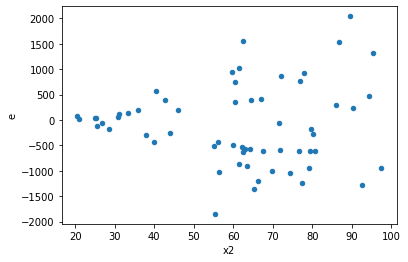

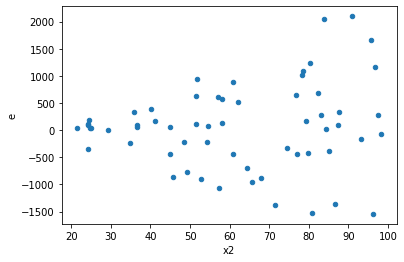

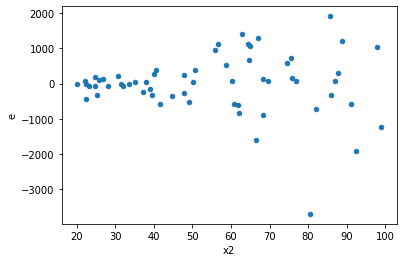

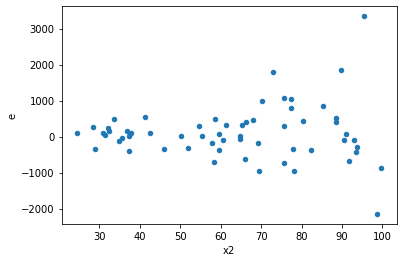

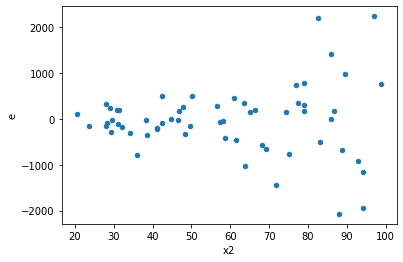

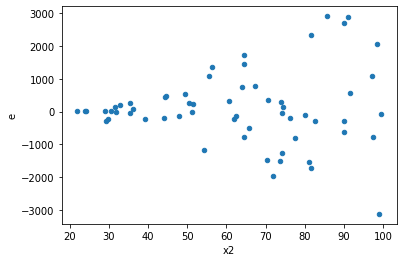

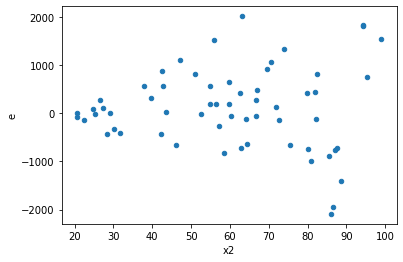

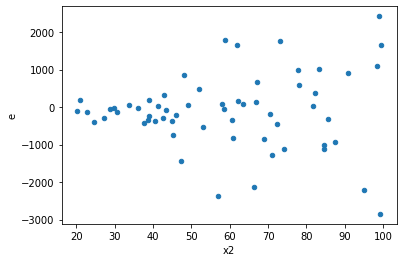

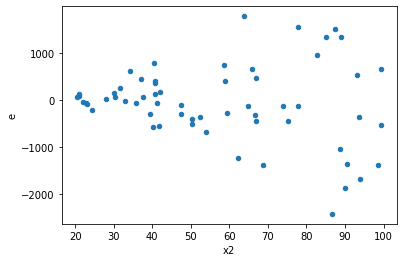

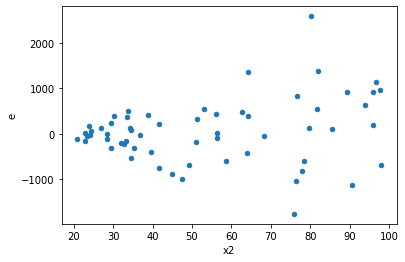

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,36.0,6928357.771092128,27875245.396827456,346417.8885546064,774312.372134096,2.235197424026906,0.03479535528643751,0.9826023223567812,0.017397677643218756,Reject001=1 : Homoscedasticity
1.0,33.0,23.0,13618874.147291567,13428470.52111573,412693.15597853233,583846.5443963361,1.4147231082909135,0.38931831662965855,0.8053408416851707,0.19465915831482927,Reject001=1 : Homoscedasticity
4.0,36.0,20.0,15530771.532143077,16634899.808498606,431410.3203373077,831744.9904249304,1.9279672998425539,0.12118563461156873,0.9394071826942156,0.06059281730578436,Reject001=1 : Homoscedasticity
7.0,21.0,35.0,9850438.046736108,42105862.329267435,469068.47841600515,1203024.6379790695,2.5647100441316306,0.013314811078293243,0.9933425944608534,0.006657405539146621,Reject001=1 : Homoscedasticity
8.0,32.0,24.0,10871274.314437237,24131974.28383997,339727.32232616364,1005498.9284933321,2.9597234676579176,0.007591978859357473,0.9962040105703213,0.0037959894296787366,Reject001=0 : Heteroscedasticity
10.0,34.0,22.0,10874025.692263106,20534604.116256792,319824.28506656195,933391.0961934905,2.918449723101024,0.010360208656428949,0.9948198956717855,0.005180104328214474,Reject001=1 : Homoscedasticity
13.0,34.0,22.0,5179706.694853276,15328461.66214535,152344.3145545081,696748.2573702432,4.573510074253213,0.00040752154131817875,0.9997962392293409,0.00020376077065908937,Reject001=0 : Heteroscedasticity
15.0,28.0,28.0,18412884.79464052,23704376.013994396,657603.0283800185,846584.857642657,1.2873798037825166,0.5082714687059313,0.7458642656470343,0.25413573435296566,Reject001=1 : Homoscedasticity
17.0,32.0,24.0,17444044.73617993,44114518.40722008,545126.3980056228,1838104.93363417,3.3718875848958807,0.0029870408334931042,0.9985064795832534,0.0014935204167465521,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,36.0,6928357.771092128,27875245.396827456,346417.8885546064,774312.372134096,2.235197424026906,0.03479535528643751,Reject001=1 : Homoscedasticity
1.0,33.0,23.0,13618874.147291567,13428470.52111573,412693.15597853233,583846.5443963361,1.4147231082909135,0.38931831662965855,Reject001=1 : Homoscedasticity
2.0,28.0,28.0,38153565.181281745,4213342.225499639,1362627.3279029194,150476.50805355856,0.11043115382482574,1.0504966461000236e-07,Reject001=0 : Heteroscedasticity
3.0,27.0,29.0,25781069.385441307,4486568.762590693,954854.4216830113,154709.26767554114,0.16202393177679694,8.67366519636025e-06,Reject001=0 : Heteroscedasticity
4.0,36.0,20.0,15530771.532143077,16634899.808498606,431410.3203373077,831744.9904249304,1.9279672998425539,0.12118563461156873,Reject001=1 : Homoscedasticity
5.0,30.0,26.0,62031751.14258567,7599548.620071833,2067725.0380861892,292290.3315412243,0.14135841379168942,1.0281868697612807e-06,Reject001=0 : Heteroscedasticity
6.0,31.0,25.0,21254956.91169676,16348886.518625325,685643.7713450568,653955.460745013,0.9537831277342759,0.8909462928102758,Reject001=1 : Homoscedasticity
7.0,21.0,35.0,9850438.046736108,42105862.329267435,469068.47841600515,1203024.6379790695,2.5647100441316306,0.013314811078293243,Reject001=1 : Homoscedasticity
8.0,32.0,24.0,10871274.314437237,24131974.28383997,339727.32232616364,1005498.9284933321,2.9597234676579176,0.007591978859357473,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    601
Reject001=1 : Homoscedasticity      399
Name: Result_test, dtype: int64